# 1. Исследование Данных и Предобработка

Этот ноутбук предназначен для загрузки примеров изображений рукописных математических уравнений и применения к ним базовых шагов предобработки с использованием OpenCV.

In [1]:
import cv2 # OpenCV для обработки изображений
import numpy as np # Для работы с массивами
import matplotlib.pyplot as plt # Для отображения изображений
import os # Для работы с файловой системой

# Настройка для отображения изображений в Matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

## Загрузка Изображения

Загрузим пример изображения. 

**Важно:** Замените `image_path` на реальный путь к вашему файлу изображения. Рекомендуется создать папку `sample_images` внутри `notebooks` и поместить изображение туда.

Изображение загружено: sample_images/train/CROHME2019/106_jorge.png, Форма: (1010, 1010, 3)


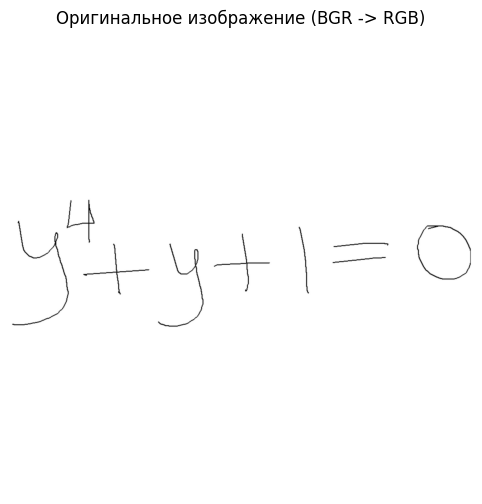

In [2]:
# --- ЗАМЕНИТЕ ЭТОТ ПУТЬ ---
image_path = 'sample_images/train/CROHME2019/106_jorge.png' 
# ---------------------------

# Проверяем, существует ли файл
if not os.path.exists(image_path):
    print(f"Ошибка: Файл не найден по пути: {image_path}")
    print("Пожалуйста, убедитесь, что файл существует и путь указан верно.")
    image_bgr = None # Устанавливаем None, чтобы последующие ячейки не падали
else:
    # Загружаем изображение в цвете (формат BGR по умолчанию в OpenCV)
    image_bgr = cv2.imread(image_path)
    
    if image_bgr is None:
        print(f"Ошибка: Не удалось загрузить изображение {image_path}, проверьте формат файла.")
    else:
        print(f"Изображение загружено: {image_path}, Форма: {image_bgr.shape}")
        # Отображаем оригинальное изображение
        plt.figure()
        plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)) # Конвертируем в RGB для Matplotlib
        plt.title("Оригинальное изображение (BGR -> RGB)")
        plt.axis('off')
        plt.show()

## Преобразование в Оттенки Серого

Модели машинного обучения часто работают с одноканальными изображениями (оттенки серого), так как цвет обычно не несет важной информации для распознавания символов и упрощает модель.

Изображение преобразовано в оттенки серого, Форма: (1010, 1010)


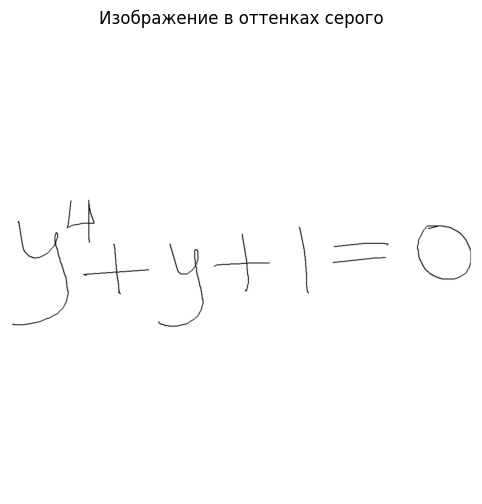

In [3]:
if image_bgr is not None:
    image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
    print(f"Изображение преобразовано в оттенки серого, Форма: {image_gray.shape}")
    
    plt.figure()
    plt.imshow(image_gray, cmap='gray')
    plt.title("Изображение в оттенках серого")
    plt.axis('off')
    plt.show()
else:
    print("Пропускаем шаг: Оригинальное изображение не было загружено.")
    image_gray = None

## Бинаризация (Пороговое Преобразование)

Бинаризация преобразует изображение в черно-белое, где каждый пиксель либо черный (фон), либо белый (объект/текст). Это помогает четко выделить символы.

Мы используем **метод Оцу** (`cv2.THRESH_OTSU`) для автоматического определения оптимального порога разделения фона и объекта. Часто полезно инвертировать результат (`cv2.THRESH_BINARY_INV`), чтобы символы были белыми (значение 255), а фон черным (значение 0).

Применен порог Оцу, вычисленное значение порога: 72.0
Бинарное изображение, Форма: (1010, 1010)


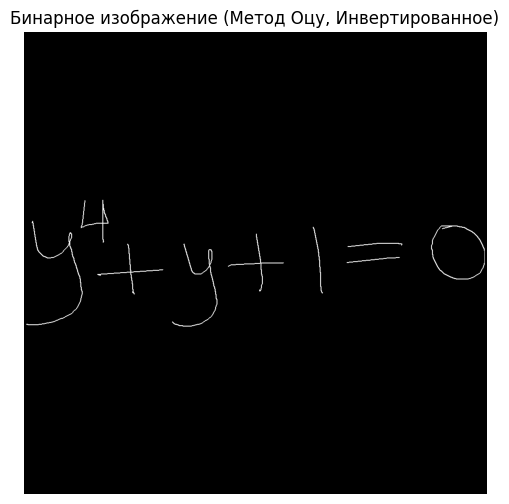

In [4]:
if image_gray is not None:
    # Применяем порог Оцу. Порог вычисляется автоматически.
    # THRESH_BINARY_INV делает объект белым (255), а фон черным (0).
    thresh_value, image_binary = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    print(f"Применен порог Оцу, вычисленное значение порога: {thresh_value}")
    print(f"Бинарное изображение, Форма: {image_binary.shape}")

    plt.figure()
    plt.imshow(image_binary, cmap='gray')
    plt.title("Бинарное изображение (Метод Оцу, Инвертированное)")
    plt.axis('off')
    plt.show()
else:
    print("Пропускаем шаг: Изображение в оттенках серого недоступно.")
    image_binary = None

## Следующие Шаги Предобработки (Обсуждение)

После базовых шагов, дальнейшая предобработка может включать:

1.  **Изменение размера (Resizing):** Приведение всех изображений к единому размеру, который ожидает модель (например, 64x256 пикселей). Важно выбрать метод интерполяции (`cv2.INTER_AREA` для уменьшения, `cv2.INTER_CUBIC` или `cv2.INTER_LINEAR` для увеличения).
2.  **Нормализация:** Приведение значений пикселей к определенному диапазону (например, [0, 1] путем деления на 255.0).
3.  **Удаление шума:** Применение фильтров (например, Гаусса `cv2.GaussianBlur` или медианного `cv2.medianBlur`), если изображения зашумлены.
4.  **Морфологические операции:** Эрозия и дилатация (`cv2.erode`, `cv2.dilate`) могут помочь убрать мелкий шум или соединить разорванные части символов.
5.  **Поиск контуров (`cv2.findContours`):** Может быть полезен для выделения отдельных символов или строк, хотя для end-to-end моделей это может быть излишним.
6.  **Аугментация:** Искусственное создание новых обучающих примеров путем применения случайных искажений к существующим изображениям (поворот, сдвиг, масштабирование, добавление шума). Это делается на этапе обучения.

Эти шаги стоит реализовать как функции в `src/preprocessing/image_processing.py`.